In [12]:
import pandas as pd
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
from geopy.geocoders import Nominatim
import geopy
pd.set_option('max_colwidth', 400)

In [13]:
pip install Fiona

     |████████████████████████████████| 18.5 MB 62.2 MB/s eta 0:00:01   |█▋                              | 931 kB 4.4 MB/s eta 0:00:05     |██████████████████████▉         | 13.2 MB 4.4 MB/s eta 0:00:02
Note: you may need to restart the kernel to use updated packages.


In [ ]:
'housing_combined_final.csv'

In [2]:
housing_data= pd.read_csv('squareMidhkp_data_final.csv')
combined = pd.read_csv('combined_district.csv')
housing_data=housing_data.fillna('')
housing_data=housing_data.drop(columns='Unnamed: 0')

NameError: name 'pd' is not defined

In [437]:
for column in ['Balcony', 'Club House', 'Garden View', 'Lux_Revo', 'MTR nearby',
       'Mountain View', 'River View', 'Rooftop', 'Sea View',
       'Shopping Mall nearby', 'Swimming', 'Terrace','bedroom_amount','car_parking', 'net_area', 'price', 'price_per']:
    housing_data[column] = pd.to_numeric(housing_data[column],errors= 'coerce')
housing_data=housing_data.fillna(0)

In [438]:
not_in_real_area = []
list_location = housing_data.location.unique()
real_area = combined.area.tolist()
for i in list_location:
    if (i in real_area) == False:
        not_in_real_area.append(i)

In [440]:
not_in_real_area
fixed = ['Fo Tan','Sha Tin','Sai Kung Town','Mid-Levels','Sham Tseng','Tai Wo Estate','Tai Kok Tsui','Jordan',
'Pok Fu Lam','Lantau Island','Yau Yat Chuen','Mid-Levels','Mid-Levels','LOHAS Park','Deep Water Bay',
'Pass_holder_Southern District','Aberdeen','Kowloon City','Tuen Mun','North Point','Shau Kei Wan','Tuen Mun','Wan Chai','Mid-Levels',
'Happy Valley','Central District','Happy Valley','Fanling','Tin Shui Wai','Wong Tai Sin (Chuk Un)','Pass_holder_HongKongWest',
 'Beacon Hill','Mid-Levels','Mei Foo Sun Chuen',"King's Park",'LOHAS Park','Tseung Kwan O','Pok Fu Lam',"Tiu Keng Leng / Rennie's Mill",
'Pass_holder_Island','Lok Fu Estate','Sha Tin','Pass_holder_?','Tseung Kwan O']

In [441]:
def renamer(previous,correct):
    helper = housing_data[housing_data.location==previous].index
    for counter in helper:
        housing_data.iloc[helper,18] = correct

In [442]:
for i,j in zip(not_in_real_area,fixed):
    renamer(i,j)

In [443]:
renamer('Lantau Island','Lantau Island, Tsuen Wan')
renamer('Tuen Mun','Tuen Mun (Tuen Mun New Town)')

In [444]:
not_in_real_area = []
list_location = housing_data.location.unique()
real_area = combined.area.tolist()
for i in list_location:
    if (i in real_area) == False:
        not_in_real_area.append(i)
not_in_real_area

['Pass_holder_Southern District',
 'Pass_holder_HongKongWest',
 'Beacon Hill',
 'Pass_holder_Island',
 'Pass_holder_?']

In [494]:
for i in housing_combined[housing_combined.area.isnull()==True].location.unique():
    helper_index = housing_combined[housing_combined.key_0 == i].index
    if i == 'Pass_holder_Southern District':
        for i in helper_index:
            housing_combined.loc[i,'district'] = 'Southern District'
            housing_combined.loc[i,'region'] = 'Hong Kong Island'
            housing_combined.loc[i,'area'] = 'Unknowned'
    elif i == 'Pass_holder_HongKongWest':
        for i in helper_index:
            housing_combined.loc[i,'district'] = 'Central and Western District'
            housing_combined.loc[i,'region'] = 'Hong Kong Island'
            housing_combined.loc[i,'area'] = 'Unknowned'
    elif i == 'Beacon Hill':
        for i in helper_index:
            housing_combined.loc[i,'district'] = 'Kowloon City District'
            housing_combined.loc[i,'region'] = 'Kowloon'
            housing_combined.loc[i,'area'] = 'Unknowned'
    else:
        for i in helper_index:
            housing_combined.loc[i,'district'] = 'Unknowned'
            housing_combined.loc[i,'region'] = 'Unknowned'
            housing_combined.loc[i,'area'] = 'Unknowned'

In [498]:
housing_combined = housing_combined.drop(columns=['key_0','Unnamed: 0'])

In [512]:
housing_combined.columns

Index(['Balcony', 'Club House', 'Garden View', 'Lux_Revo', 'MTR nearby',
       'Mountain View', 'River View', 'Rooftop', 'Sea View',
       'Shopping Mall nearby', 'Swimming', 'Terrace', 'address',
       'bedroom_amount', 'building', 'car_parking', 'floor_level', 'link',
       'location', 'net_area', 'price', 'price_per', 'district', 'area',
       'region'],
      dtype='object')

In [541]:
list_convert = ['Balcony', 'Club House', 'Garden View', 'Lux_Revo', 'MTR nearby',
       'Mountain View', 'River View', 'Rooftop', 'Sea View',
       'Shopping Mall nearby', 'Swimming', 'Terrace','floor_level','net_area','price','bedroom_amount','car_parking',
        'price_per']
for i in list_convert:
    try:
        housing_combined[i] = housing_combined[i].astype(int)
    except:
        print(i)

floor_level


<AxesSubplot:>

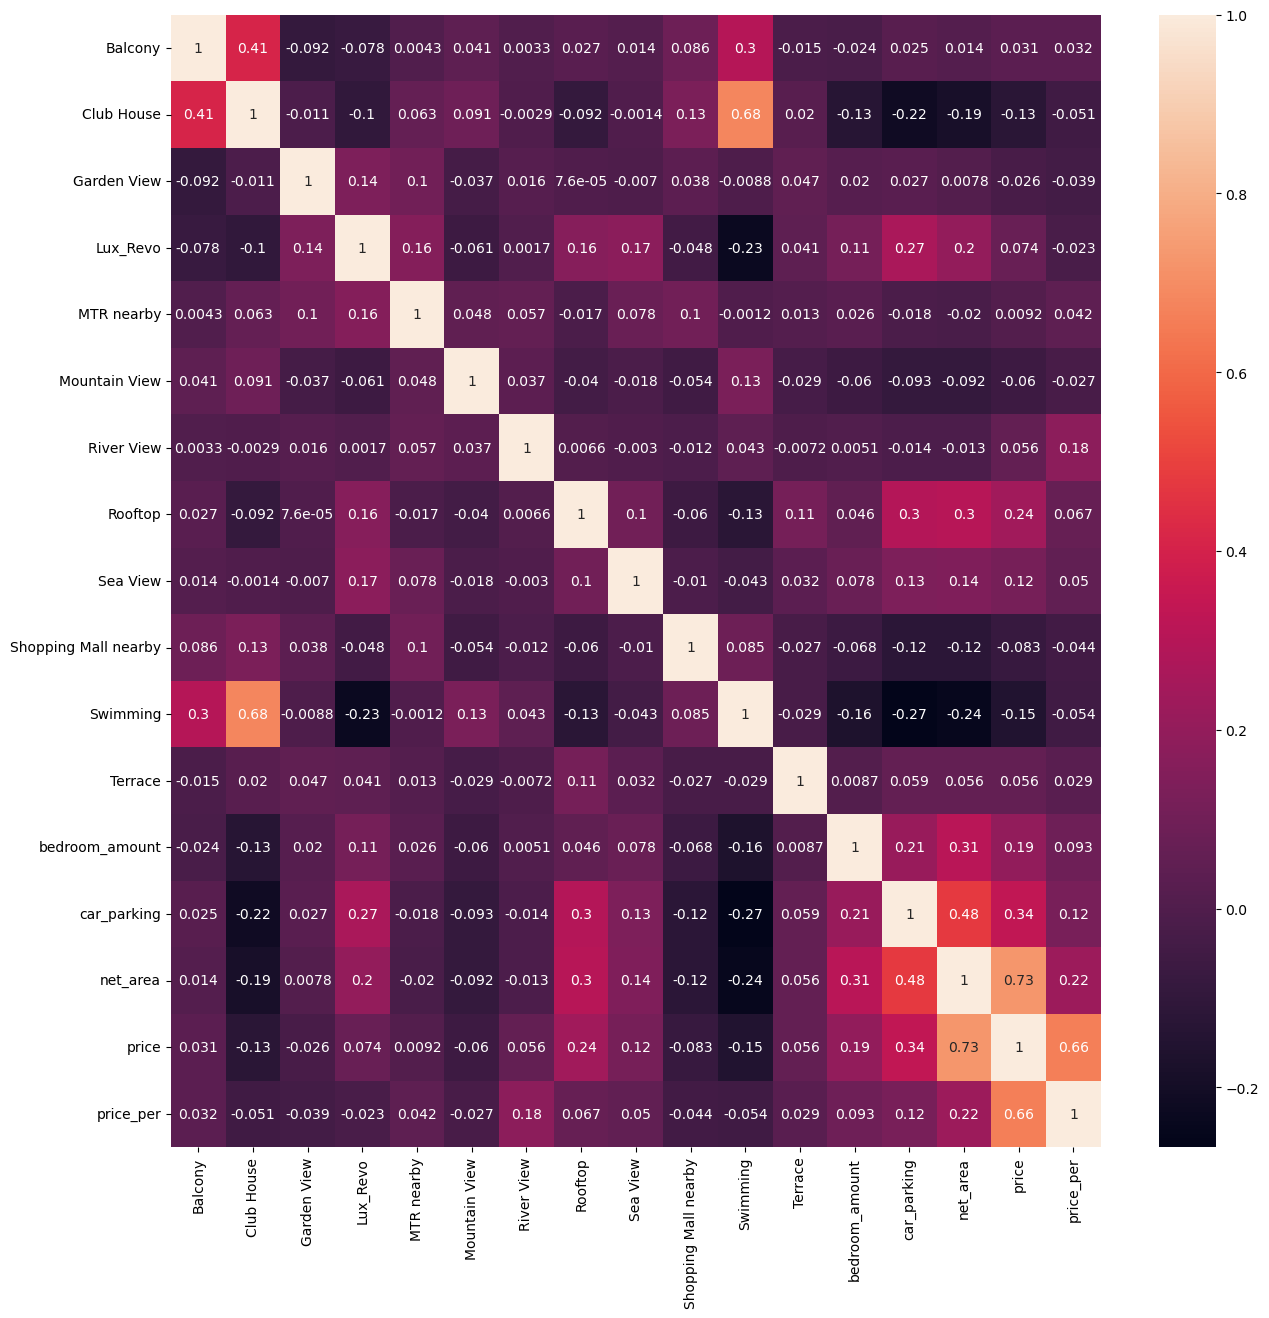

In [542]:
plt.figure(figsize=(15, 15), dpi=100)
sns.heatmap(housing_combined.corr(),annot=True)

In [608]:
from sklearn.feature_selection import mutual_info_regression
mutual = housing_combined
mutual_x = mutual.drop(columns=['link','address','building','price','price_per'])
mutual_y = mutual['price']
mutual_x.select_dtypes(include=['object'])

,floor_level,location,district,area,region
0,,Ma On Shan,Sha Tin District,Ma On Shan,New Territories
1,,Fo Tan,Sha Tin District,Fo Tan,New Territories
2,,Sha Tin,Sha Tin District,Sha Tin,New Territories
3,,Tai Wai,Sha Tin District,Tai Wai,New Territories
4,,Tai Po,Tai Po District,Tai Po,New Territories
...,...,...,...,...,...
21895,L,Yuen Long,Yuen Long District,Yuen Long,New Territories
21896,M,Ma On Shan,Sha Tin District,Ma On Shan,New Territories
21897,M,Tsuen Wan,Tsuen Wan District,Tsuen Wan,New Territories
21898,H,Ma On Shan,Sha Tin District,Ma On Shan,New Territories


In [609]:
mutual_x.select_dtypes(include=['object']).columns.tolist()

['floor_level', 'location', 'district', 'area', 'region']

In [610]:
from sklearn.preprocessing import LabelEncoder
for i in mutual_x.select_dtypes(include=['object']).columns.tolist():
    le = LabelEncoder()
    le.fit(mutual_x[i])
    mutual_x[i]=pd.Series(le.transform(mutual_x[i]))

In [611]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
i = 0
mi_list = []
while i < 16:
    mi_scores = make_mi_scores(mutual_x, mutual_y)
    mi_list.append(mi_scores.to_dict())
    i += 1

In [612]:
mi_mean = pd.DataFrame(mi_list).mean()
mi_mean

net_area                0.553668
bedroom_amount          0.239376
car_parking             0.104043
region                  0.082081
location                0.079389
area                    0.073178
floor_level             0.063433
district                0.065669
Swimming                0.048772
Club House              0.034321
Lux_Revo                0.020675
Shopping Mall nearby    0.024052
Rooftop                 0.025961
Sea View                0.015295
Mountain View           0.015761
Terrace                 0.008146
MTR nearby              0.008706
Balcony                 0.014564
Garden View             0.005720
River View              0.001097
dtype: float64

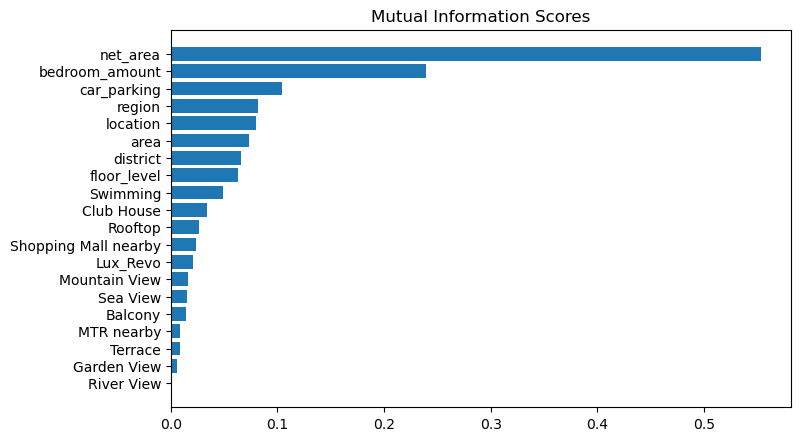

In [614]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = scores.index.tolist()
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_mean)

In [704]:
housing_combined.to_csv('housing_combined_final.csv')

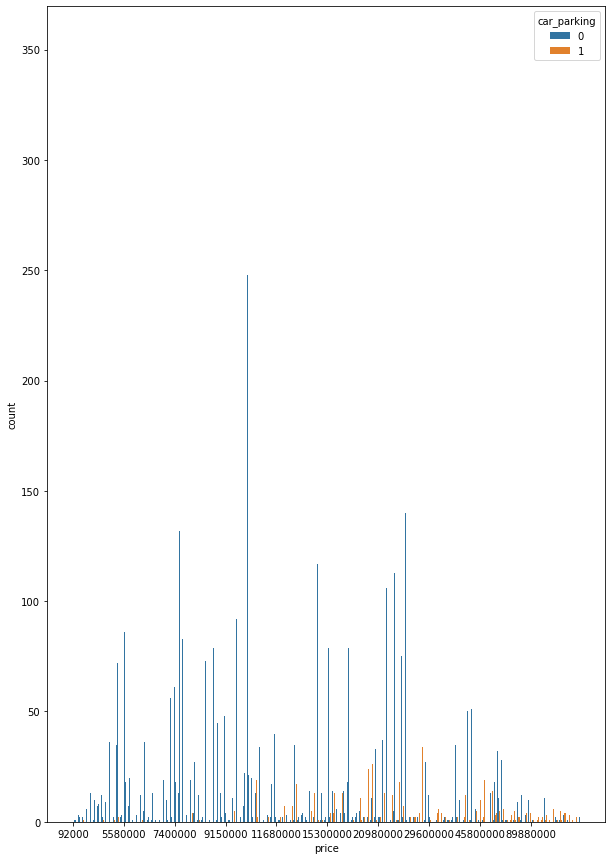

In [694]:
fig, ax = plt.subplots(figsize=(10, 15))
sns.countplot(x='price',hue='car_parking',data=housing_combined,ax=ax)
plt.locator_params(axis='x', nbins=10)
plt.show()

In [707]:
housing_combined[housing_combined.net_area > 350].sort_values('price').head(50)

,Balcony,Club House,Garden View,Lux_Revo,MTR nearby,Mountain View,River View,Rooftop,Sea View,Shopping Mall nearby,...,car_parking,floor_level,link,location,net_area,price,price_per,district,area,region
3785,0,0,0,0,0,0,0,0,0,0,...,0,,https://www.squarefoot.com.hk/buy/residential/property-28023,North Point,653,92000,141,Eastern District,North Point,Hong Kong Island
6476,0,0,1,1,0,0,0,0,1,0,...,0,,https://www.squarefoot.com.hk/buy/residential/property-32844,Discovery Bay,1119,1560000,1394,Islands District,Discovery Bay,New Territories
2966,0,1,0,1,0,0,0,1,0,0,...,0,H,https://www.squarefoot.com.hk/buy/residential/property-23295,Yau Yat Chuen,2638,1680000,637,Sham Shui Po District,Yau Yat Chuen,Kowloon
2965,0,1,0,1,0,0,0,1,0,0,...,0,H,https://www.squarefoot.com.hk/buy/residential/property-23295,Yau Yat Chuen,2638,1680000,637,Sham Shui Po District,Yau Yat Chuen,Kowloon
4732,0,0,0,1,0,0,0,0,0,0,...,0,H,https://www.squarefoot.com.hk/buy/residential/property-29786,Tai Po,443,2280000,5147,Tai Po District,Tai Po,New Territories
4500,0,0,0,0,0,0,0,0,0,0,...,0,,https://www.squarefoot.com.hk/buy/residential/property-13524,Sai Kung Town,550,3000000,5455,Sai Kung District,Sai Kung Town,New Territories
19247,0,0,0,1,0,0,0,0,0,0,...,0,,https://www.hkp.com.hk/en/property/Kowloon-Kwun-Tong-Lam-Tin-Yau-Tong-Hong-Ning-Building-H200202119,Lam Tin,385,3300000,8571,Kwun Tong District,Lam Tin,Kowloon
19246,0,0,0,1,0,0,0,0,0,0,...,0,,https://www.hkp.com.hk/en/property/Kowloon-Kwun-Tong-Lam-Tin-Yau-Tong-Hong-Ning-Building-H200202119,Lam Tin,385,3300000,8571,Kwun Tong District,Lam Tin,Kowloon
4486,0,0,1,1,0,0,0,0,0,0,...,0,H,https://www.squarefoot.com.hk/buy/residential/property-29420,Stanley,421,3400000,8076,Southern District,Stanley,Hong Kong Island
4528,0,0,1,1,0,0,0,0,0,0,...,0,H,https://www.squarefoot.com.hk/buy/residential/property-29498,Stanley,421,3400000,8076,Southern District,Stanley,Hong Kong Island


In [396]:
list_location = housing_data.location.unique()

In [397]:
housing_data.groupby('location')['link'].count()

location
Aberdeen          40
Admiralty          8
Ap Lei Chau       96
Baguio Villa      49
Beacon Hill      125
                ... 
Wong Tai Sin       1
Yau Ma Tei        72
Yau Tong           2
Yau Yat Tsuen     24
Yuen Long        115
Name: link, Length: 115, dtype: int64

In [398]:
not_in_real_area = []
list_location = housing_data.location.unique()
real_area = combined.area.tolist()
for i in list_location:
    if (i in real_area) == False:
        not_in_real_area.append(i)

In [423]:
not_in_real_area
fixed = ['Fo Tan','Sha Tin','Sai Kung Town','Mid-Levels','Sham Tseng','Tai Wo Estate','Tai Kok Tsui','Jordan',
'Pok Fu Lam','Lantau Island','Yau Yat Chuen','Mid-Levels','Mid-Levels','LOHAS Park','Deep Water Bay',
'Pass_holder_Southern District','Aberdeen','Kowloon City','Tuen Mun','North Point','Shau Kei Wan','Tuen Mun','Wan Chai','Mid-Levels',
'Happy Valley','Central District','Happy Valley','Fanling','Tin Shui Wai','Wong Tai Sin (Chuk Un)','Pass_holder_HongKongWest',
 'Beacon Hill','Mid-Levels','Mei Foo Sun Chuen',"King's Park",'LOHAS Park','Tseung Kwan O','Pok Fu Lam',"Tiu Keng Leng / Rennie's Mill",
'Pass_holder_Island','Lok Fu Estate','Sha Tin','Pass_holder_?','Tseung Kwan O']

In [ ]:
def renamer(previous,correct):
    helper = housing_data[housing_data.location==previous].index
    for counter in helper:
        housing_data.iloc[helper,18] = correct

In [425]:
for i,j in zip(not_in_real_area,fixed):
    renamer(i,j)

In [429]:
housing_data.location.unique()

array(['Ma On Shan', 'Fo Tan', 'Sha Tin', 'Tai Wai', 'Tai Po',
       'Sai Ying Pun', 'Sai Kung Town', 'Clear Water Bay', 'Mid-Levels',
       'Kennedy Town', 'Pok Fu Lam', 'Sham Tseng', 'Yuen Long',
       'Ho Man Tin', 'Tai Wo Estate', 'Repulse Bay', 'Sheung Shui',
       'Discovery Bay', 'Tai Tam', 'Sai Wan Ho', 'Tai Kok Tsui',
       'Shek Kip Mei', 'Tseung Kwan O', 'Jordan', 'Wan Chai',
       'Quarry Bay', 'Tai Hang', 'Taikoo Shing', 'Lantau Island',
       'Lamma Island', 'Yau Yat Chuen', 'LOHAS Park', 'Deep Water Bay',
       'Kowloon Tong', 'Tung Chung', 'Yau Ma Tei',
       'Pass_holder_Southern District', 'Aberdeen', 'Kowloon City',
       'Tuen Mun', 'North Point', 'Stanley', 'Ma Wan', 'Hung Hom',
       'Happy Valley', 'Sheung Wan', 'Causeway Bay', 'Mong Kok',
       'Shau Kei Wan', 'Prince Edward', 'Tin Hau', 'Fortress Hill',
       'Tsim Sha Tsui', 'Shek O', 'Ap Lei Chau', 'Central District',
       'Admiralty', 'Wong Chuk Hang', 'Siu Sai Wan', 'Shek Tong Tsui',
       '

In [377]:
def renamer(previous,correct):
    helper = housing_data[housing_data.location==previous].index
    for counter in helper:
        housing_data.iloc[helper,18] = correct

In [374]:
helper = housing_data[housing_data.location=='Baguio Villa'].index
for counter in helper:
    housing_data.iloc[helper,18] = 'Pok Fu Lam'

In [375]:
helper = housing_data[housing_data.location=='Tuen Mun Castle Peak Road'].index
for counter in helper:
    housing_data.iloc[helper,18] = 'Tuen Mun'

In [376]:
helper = housing_data[housing_data.location=='Western mid-levels'].index
for counter in helper:
    housing_data.iloc[helper,18] = 'Mid-Levels'

In [430]:
combined = pd.read_csv('combined_district.csv')
combined.area.tolist()

['Central District',
 'Admiralty',
 'Mid-Levels',
 'Soho',
 'Sai Wan',
 'Kennedy Town',
 'Sai Ying Pun',
 'Shek Tong Tsui',
 'Sheung Wan',
 'Chai Wan',
 'North Point',
 'Braemar Hill',
 'Fortress Hill',
 'North Point Mid-Levels',
 'Quarry Bay',
 'Kornhill',
 'Taikoo Shing',
 'Sai Wan Ho',
 'Shau Kei Wan',
 'Heng Fa Chuen',
 'Aldrich Bay',
 'A Kung Ngam',
 'Aberdeen',
 'Ap Lei Chau',
 'Chung Hom Kok',
 'Siu Sai Wan',
 'Cyberport',
 'Telegraph Bay',
 'Deep Water Bay',
 'Pok Fu Lam',
 'Sandy Bay',
 'Shan Ting',
 'Wah Fu',
 'Tin Wan',
 'Repulse Bay',
 'Stanley',
 'Shek O',
 'Big Wave Bay',
 'Tai Tam',
 'Wong Chuk Hang',
 'Nam Long Shan',
 'Ocean Park',
 'Causeway Bay',
 'Tin Hau',
 'Caroline Hill',
 'Happy Valley',
 "Jardine's Lookout",
 'Tai Hang',
 'Wan Chai',
 'Ho Man Tin',
 'Hung Hom',
 'Whampoa Garden',
 'Kowloon City',
 'Kowloon Tong',
 'Kowloon Tsai',
 'Ma Tau Kok',
 'Ma Tau Wai',
 'To Kwa Wan',
 'Ho Man Tin',
 'Hung Hom',
 'Whampoa Garden',
 'Kowloon City',
 'Kowloon Tong',
 'Kowlo

In [723]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="myApp")
housing_combined[['location_lat', 'location_long']] = housing_combined['address'].apply(
    geolocator.geocode).apply(lambda x: pd.Series(
        [x.latitude, x.longitude], index=['location_lat', 'location_long']))

GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=HKD%242%2C400&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))

In [11]:
not_in_real_area

<module 'geopy.exc' from '/Users/jackyleung/opt/anaconda3/lib/python3.9/site-packages/geopy/exc.py'>

In [727]:
geolocator.geocode('The Nova, Hong Kong').longitude

22.2856088

In [728]:
lat = []
long =[]
i=1
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="http")
for address in housing_combined.address:
    try:
        lat.append(geolocator.geocode(address).latitude)
        long.append(geolocator.geocode(address).longitude)
    except:
        lat.append('None')
        long.append('None')
        print(i)
    i+=1 

12
17
39
52
55
57
58
60
62
63
84
100
101
105
110
130
131
134
137
139
140
147
154
162
164
165
166
167
171
176
182
193
197
198
201
203
206
212
217
227
228
253
263
276
282
287
314
345
352
353
361
363
370
373
376
383
388
393
394
399
404
413
414
421
422
426
427
430
431
432
433
438
439
445
446
447
448
455
464
468
492
493
494
495
496
499
501
517
520
521
525
526
528
529
538
544
545
569
572
574
575
576
577
596
597
598
600
601
604
608
613
617
618
625
627
628
633
634
641
669
670
701
702
703
704
711
732
733
746
753
758
759
760
769
786
802
803
811
815
824
834
840
842
843
852
862
867
868
869
870
873
889
903
904
905
906
908
916
919
926
944
958
995
1022
1049
1062
1118
1119
1134
1146
1178
1192
1203
1218
1230
1248
1253
1301
1321
1371
1387
1389
1390
1392
1393
1394
1395
1403
1407
1450
1451
1452
1453
1454
1458
1478
1480
1482
1517
1518
1526
1533
1570
1572
1575
1577
1579
1588
1606
1613
1620
1623
1636
1654
1655
1682
1686
1693
1705
1708
1716
1728
1730
1758
1771
1778
1821
1829
1840
1858
1889
1891
1903
1913
1981

In [755]:
housing_combined = housing_combined.drop_duplicates(subset='link',keep='first')

In [769]:
housing_combined[['address']].sort_values('address').head(45)

,address
3151,$1500
5818,$3.98/呎
412,*
146,*
4159,*
4767,*
413,*
3032,-
3896,-
2767,-


In [1]:
lat = []
long =[]
i=1
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="http",timeout=1)
for address in housing_combined.address:
    if len(address) < 10:
        lat.append('None')
        long.append('None')
    else:
        try:
            lat.append(geolocator.geocode(address + ', Hong Kong').latitude)
            long.append(geolocator.geocode(address+ ', Hong Kong').longitude)
        except:
            lat.append('None')
            long.append('None')
            print(i)
    i+=1 

NameError: name 'housing_combined' is not defined

In [776]:
geolocator.geocode('1 Alnwick Road, Kowloon Tong,Kowloon,Hong Kong').latitude

22.3430249

In [802]:
%%time
geolocator.geocode(address +',New Territories '+ ', Hong Kong').longitude

CPU times: user 3.37 ms, sys: 1.83 ms, total: 5.2 ms
Wall time: 314 ms


114.2395962

In [798]:
%%time
geolocator.geocode(address + ', Hong Kong').longitude

CPU times: user 3.21 ms, sys: 1.76 ms, total: 4.97 ms
Wall time: 486 ms


114.2395962

In [788]:
address + ', Hong Kong'

'8 Wu Kai Sha Road, Hong Kong'

In [5]:
housing_combined

NameError: name 'housing_combined' is not defined

In [806]:
len('1 Alnwick Road')

14